In [7]:
from keras.datasets import imdb

(train_data, train_label), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\clare\anaconda3\envs\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\clare\anaconda3\envs\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shape

In [8]:
train_label[0]

1

In [9]:
word_index = imdb.get_word_index()
reversed_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reversed_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.0
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_label).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [12]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [13]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [15]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6471 - acc: 0.6393 - val_loss: 0.6168 - val_acc: 0.6211
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.5746 - acc: 0.7526 - val_loss: 0.5588 - val_acc: 0.7824
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.4654 - acc: 0.8619 - val_loss: 0.4130 - val_acc: 0.8765
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3437 - acc: 0.9090 - val_loss: 0.3521 - val_acc: 0.8814
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2840 - acc: 0.9201 - val_loss: 0.3165 - val_acc: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2419 - acc: 0.9307 - val_loss: 0.2992 - val_acc: 0.8865
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2106 - acc: 0.9380 - val_loss: 0.2823 - val_acc: 0.8926
Epoch 8/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1856 - a

<function matplotlib.pyplot.show(close=None, block=None)>

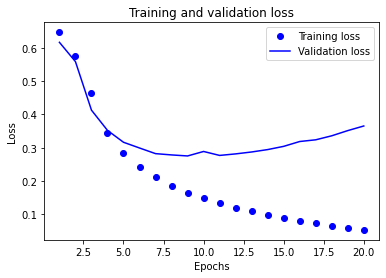

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

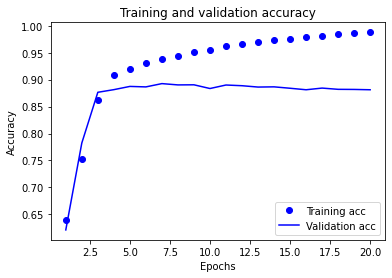

In [18]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(x_train, y_train,epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 0s 7ms/step - loss: 0.4845 - accuracy: 0.8140
Epoch 2/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2791 - accuracy: 0.9058
Epoch 3/4
49/49 [==============================] - 0s 7ms/step - loss: 0.2109 - accuracy: 0.9246
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2850 - accuracy: 0.8867


In [20]:
results

[0.284950852394104, 0.886680006980896]

In [21]:
model.predict(x_test)

array([[0.23227462],
       [0.9991356 ],
       [0.8897103 ],
       ...,
       [0.14207307],
       [0.09944353],
       [0.6664981 ]], dtype=float32)